In [11]:
!pip install matplotlib
!pip install pandas
!pip install subprocess
!pip install mplcyberpunk


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement subprocess (from versions: none)

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for subprocess



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style="darkgrid")

import mplcyberpunk
plt.style.use("cyberpunk")

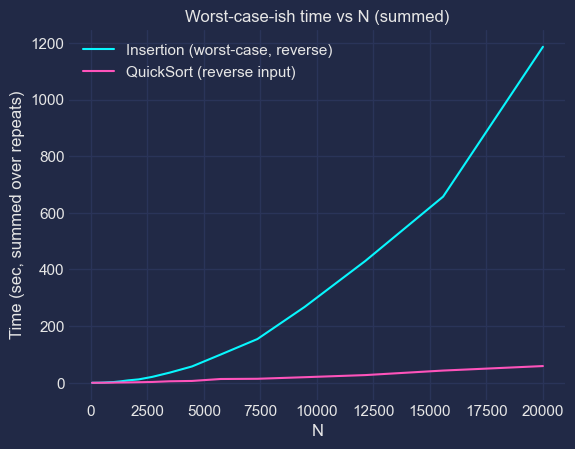

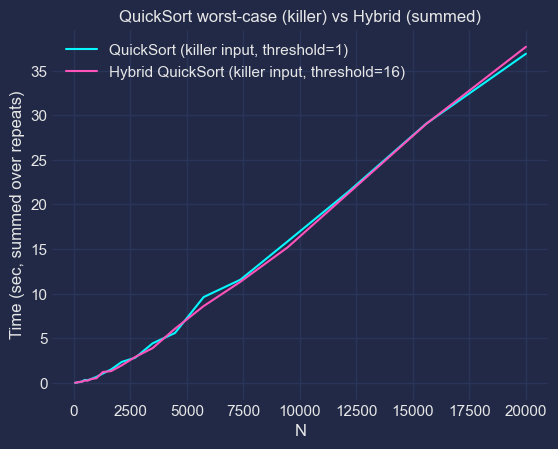

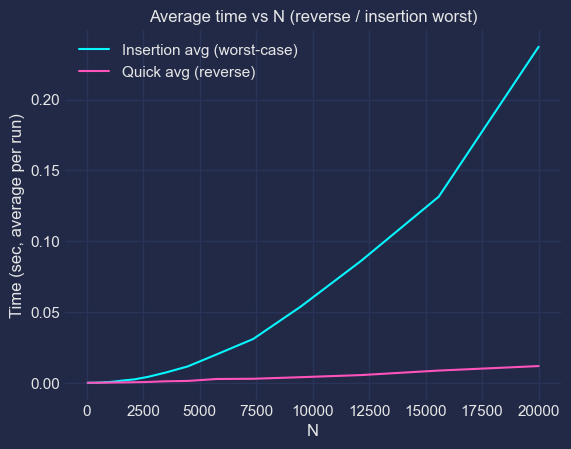

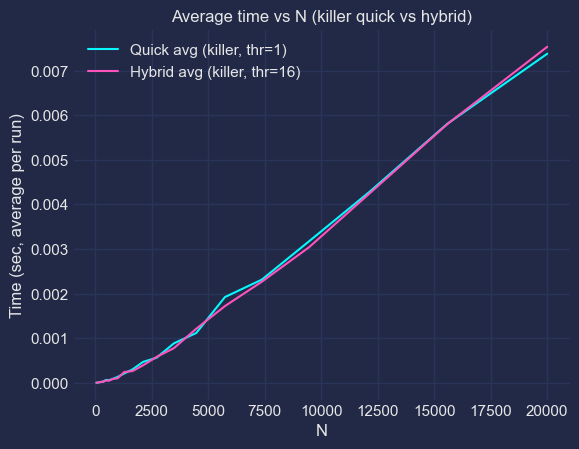

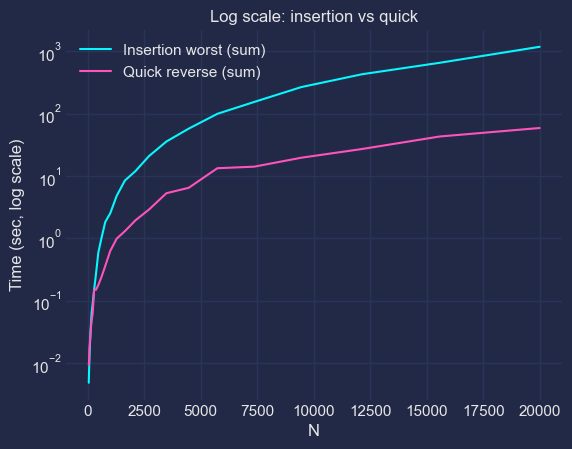

In [13]:

repeats = 5000
df = pd.read_csv("out.csv")

for col in ["insertion_worst_sec", "quick_worst_reverse_sec", "quick_worst_killer_sec", "hybrid_worst_killer_sec"]:
    df[col.replace("_sec", "_avg_sec")] = df[col] / repeats

def plot_cols(x, cols, title, ylabel):
    plt.figure()
    for c, label in cols:
        plt.plot(df[x], df[c], label=label)
    plt.xlabel(x)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_cols(
    "N",
    [
        ("insertion_worst_sec", "Insertion (worst-case, reverse)"),
        ("quick_worst_reverse_sec", "QuickSort (reverse input)"),
    ],
    "Worst-case-ish time vs N (summed)",
    "Time (sec, summed over repeats)"
)

plot_cols(
    "N",
    [
        ("quick_worst_killer_sec", "QuickSort (killer input, threshold=1)"),
        ("hybrid_worst_killer_sec", "Hybrid QuickSort (killer input, threshold=16)"),
    ],
    "QuickSort worst-case (killer) vs Hybrid (summed)",
    "Time (sec, summed over repeats)"
)

plot_cols(
    "N",
    [
        ("insertion_worst_avg_sec", "Insertion avg (worst-case)"),
        ("quick_worst_reverse_avg_sec", "Quick avg (reverse)"),
    ],
    "Average time vs N (reverse / insertion worst)",
    "Time (sec, average per run)"
)

plot_cols(
    "N",
    [
        ("quick_worst_killer_avg_sec", "Quick avg (killer, thr=1)"),
        ("hybrid_worst_killer_avg_sec", "Hybrid avg (killer, thr=16)"),
    ],
    "Average time vs N (killer quick vs hybrid)",
    "Time (sec, average per run)"
)


plt.figure()
plt.plot(df["N"], df["insertion_worst_sec"], label="Insertion worst (sum)")
plt.plot(df["N"], df["quick_worst_reverse_sec"], label="Quick reverse (sum)")
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Time (sec, log scale)")
plt.title("Log scale: insertion vs quick")
plt.legend()
plt.grid(True)
plt.show()